In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [23]:
# Carregando os dados
X_train = pd.read_csv('X_train_resampled.csv')
y_train = pd.read_csv('y_train_resampled.csv')['Diagnostico_Depressao']
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')['Diagnostico_Depressao']

In [24]:
y_test.value_counts()

Diagnostico_Depressao
0.0    9726
1.0     962
Name: count, dtype: int64

## Árvore de Decisão ##


/home/maype/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/maype/.local/lib/

Melhores Parâmetros: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
Acurácia: 0.6309
Precisão: 0.1924
Revocação: 0.9699
F1-Score: 0.3211
ROC AUC: 0.7836

Matriz de Confusão:
[[5810 3916]
 [  29  933]]


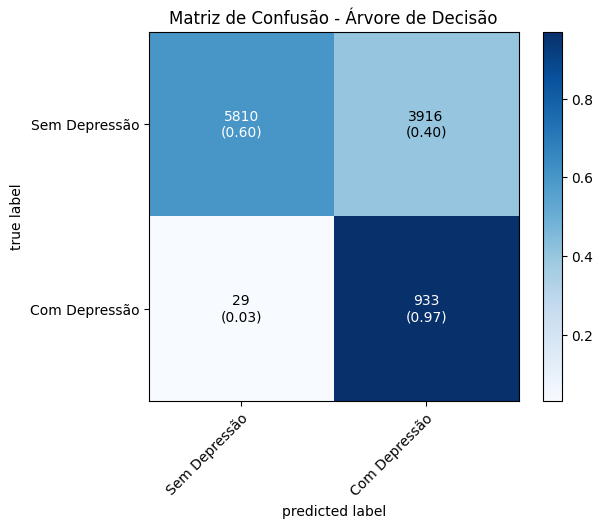

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      9726
         1.0       0.19      0.97      0.32       962

    accuracy                           0.63     10688
   macro avg       0.59      0.78      0.53     10688
weighted avg       0.92      0.63      0.71     10688



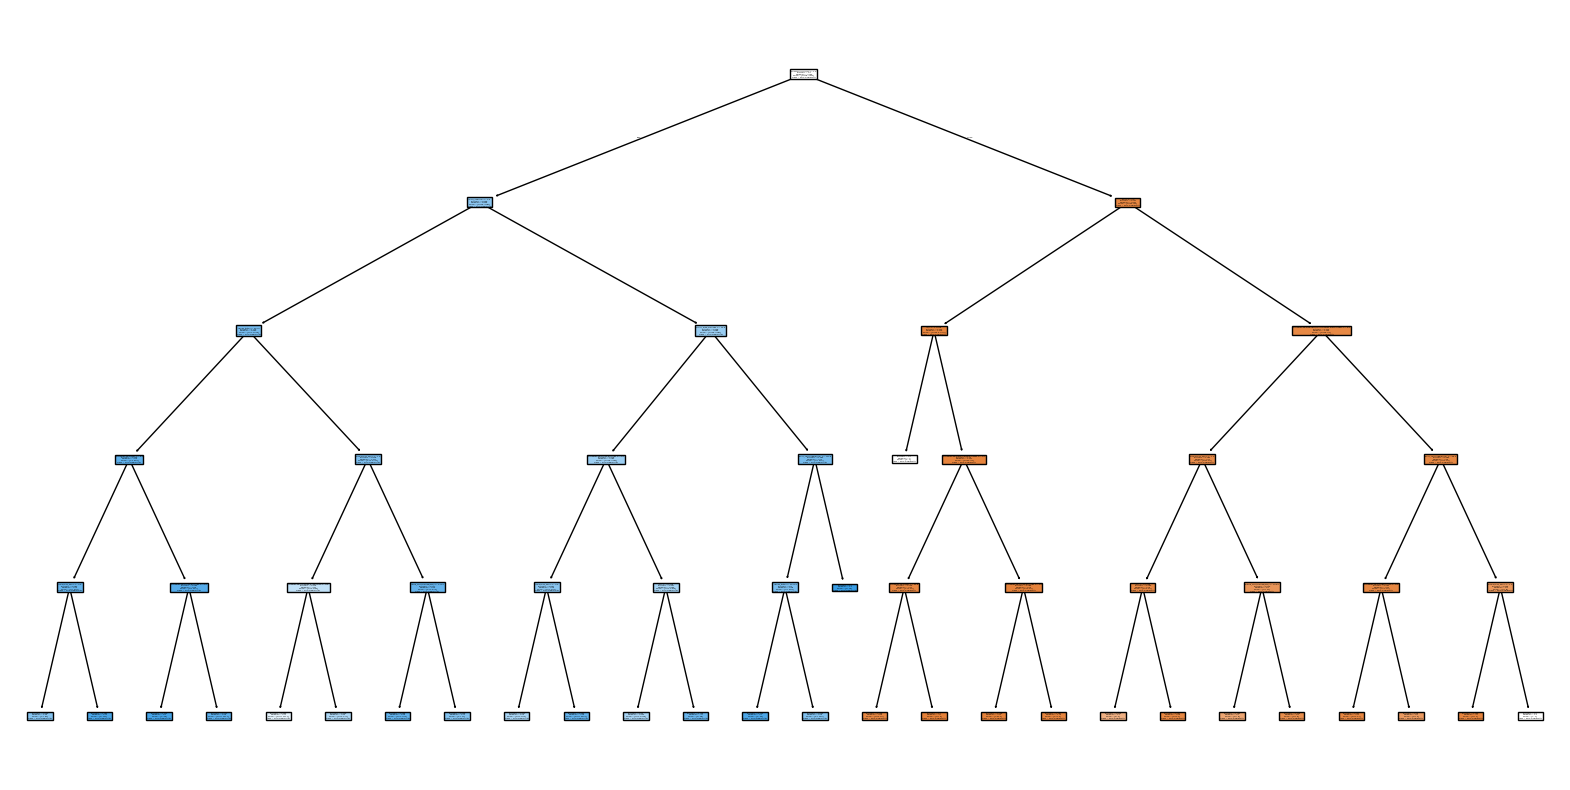

In [25]:
# Modelo de Árvore de Decisão
print("## Árvore de Decisão ##")

# Definição dos parâmetros para otimização
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Otimização de parâmetros com RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Predição com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibição da árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['Sem Depressão', 'Com Depressão'], filled=True)
plt.show()

In [26]:
# Obter a árvore treinada
tree_ = best_model.tree_

# Definir a função para extrair as regras
def get_tree_rules(tree_, feature_names):
    tree_rules = []

    def traverse_tree(node, rules=[]):
        if tree_.feature[node] != -2:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            if tree_.children_left[node] != -1:
                traverse_tree(tree_.children_left[node], rules + [f'{name} <= {threshold}'])
            if tree_.children_right[node] != -1:
                traverse_tree(tree_.children_right[node], rules + [f'{name} > {threshold}'])
        else:
            tree_rules.append((tree_.value[node], rules))

    traverse_tree(0)
    return tree_rules

# Extrair as regras da árvore treinada
tree_rules = get_tree_rules(tree_, X_train.columns)

# Imprimir as regras
for rule in tree_rules:
    value, conditions = rule
    print(f"Regra: {' and '.join(conditions)}")
    print(f"Predição: {value}")

Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total <= 250.5 and Consumo de Frutas <= 6.5 and Problemas_Sono <= 2.5
Predição: [[0.27819549 0.72180451]]
Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total <= 250.5 and Consumo de Frutas <= 6.5 and Problemas_Sono > 2.5
Predição: [[0.07438017 0.92561983]]
Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total <= 250.5 and Consumo de Frutas > 6.5 and Consumo de Sucos Naturais <= 0.5
Predição: [[0.05660377 0.94339623]]
Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total <= 250.5 and Consumo de Frutas > 6.5 and Consumo de Sucos Naturais > 0.5
Predição: [[0.15060241 0.84939759]]
Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total > 250.5 and Problemas_Sono <= 1.5 and Consumo de Verduras e Legumes <= 9.5
Predição: [[0.46376812 0.53623188]]
Regra: doencas_cronicas <= 1.5 and Apoio_Familiar <= 2.5 and renda_total > 250.5 and Problemas_Sono <= 1.5

## Floresta Aleatória ##


/home/maype/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/maype/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/maype/.local/lib/

Melhores Parâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Acurácia: 0.7243
Precisão: 0.2353
Revocação: 0.9168
F1-Score: 0.3744
ROC AUC: 0.8110

Matriz de Confusão:
[[6859 2867]
 [  80  882]]


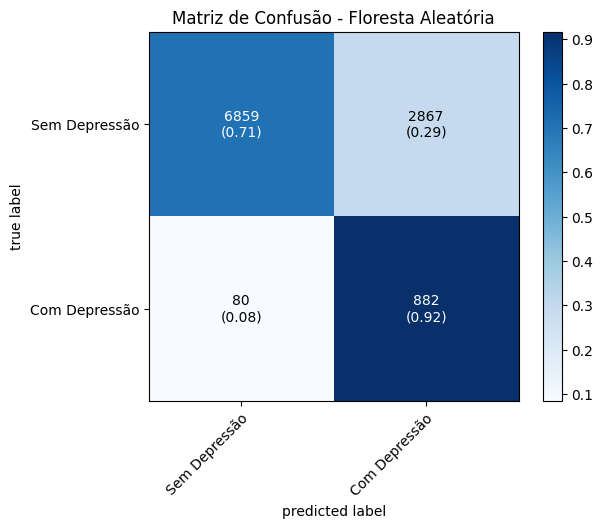

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.82      9726
         1.0       0.24      0.92      0.37       962

    accuracy                           0.72     10688
   macro avg       0.61      0.81      0.60     10688
weighted avg       0.92      0.72      0.78     10688



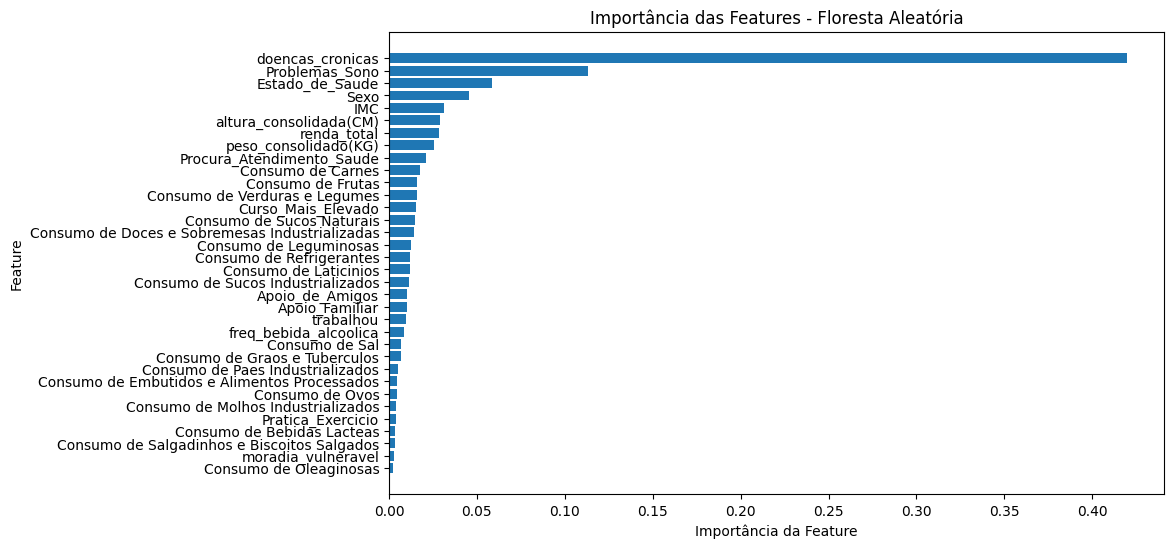

In [27]:
# Modelo de Floresta Aleatória
print("## Floresta Aleatória ##")

# Definição dos parâmetros para otimização
params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Otimização de parâmetros com RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Predição com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Floresta Aleatória')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Impressão das features mais importantes
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Importância da Feature')
plt.ylabel('Feature')
plt.title('Importância das Features - Floresta Aleatória')
plt.show()

## Naive Bayes ##
Acurácia: 0.7425
Precisão: 0.2398
Revocação: 0.8576
F1-Score: 0.3748
ROC AUC: 0.7944

Matriz de Confusão:
[[7111 2615]
 [ 137  825]]


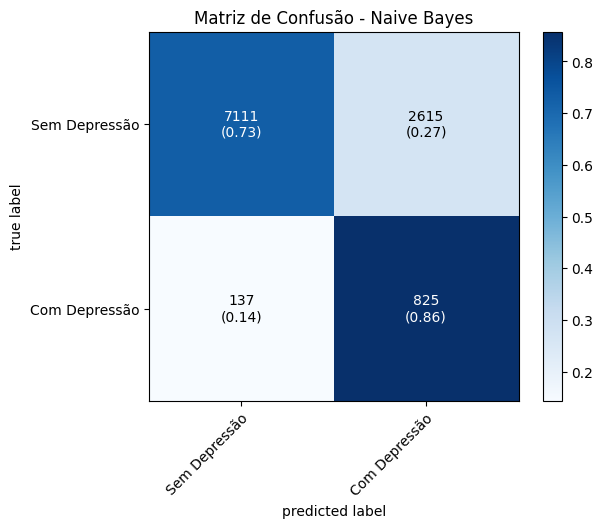

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      9726
         1.0       0.24      0.86      0.37       962

    accuracy                           0.74     10688
   macro avg       0.61      0.79      0.61     10688
weighted avg       0.91      0.74      0.80     10688



In [28]:
# Modelo Naive Bayes
print("## Naive Bayes ##")

# Criação do modelo
model = GaussianNB()

# Treinamento do modelo
model.fit(X_train, y_train)

# Predição com o modelo
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Impressão dos resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")

# Impressão da matriz de confusão
print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()

# Impressão do relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))